Portugal Crimes Report by Type & Location

In [57]:
import urllib.request, json
import pandas as pd

url = "https://www.ine.pt/ine/json_indicador/pindica.jsp?op=2&varcd=0008073&lang=PT"
response = urllib.request.urlopen(url)
data = json.loads(response.read().decode())

for item in data:
    df = pd.json_normalize(item["Dados"]["2021"])

print(df.columns)

Index(['geocod', 'geodsg', 'dim_3', 'dim_3_t', 'valor', 'sinal_conv',
       'sinal_conv_desc'],
      dtype='object')


In [53]:
#Group dataframe by

#grouped_df = df.groupby(['dim_3_t','geodsg']).sum().sort_values(by='valor', ascending=False).reset_index()

new_df = df[['dim_3_t','geodsg','valor']]
new_df['valor'] = pd.to_numeric(new_df['valor'])

print(new_df)


                             dim_3_t                  geodsg  valor
0     Condução sem habilitação legal                  Monção    4.0
1     Condução sem habilitação legal          Ponte da Barca    NaN
2     Condução sem habilitação legal           Ponte de Lima   16.0
3     Condução sem habilitação legal                   Porto  401.0
4     Condução sem habilitação legal         Póvoa de Varzim    3.0
...                              ...                     ...    ...
5499          Crimes contra o Estado            Castro Daire    NaN
5500          Crimes contra o Estado               Mangualde    NaN
5501          Crimes contra o Estado                   Nelas    NaN
5502          Crimes contra o Estado               Penamacor    0.0
5503          Crimes contra o Estado  Vila Nova da Barquinha    NaN

[5504 rows x 3 columns]


/Users/rsfagundes/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
grouped_df = new_df.groupby(['dim_3_t'])['valor'].sum().reset_index()
filtered_df = grouped_df[grouped_df['dim_3_t'] != 'Total'].sort_values(by='valor', ascending=False)
print(filtered_df)

                                              dim_3_t     valor
8                          Crimes contra o património  733028.0
6                            Crimes contra as pessoas  385952.0
3                  Crimes contra a integridade física  242443.0
4                   Crimes contra a vida em sociedade  165897.0
11           Furto de veículo e em veículo motorizado  148509.0
10              Crimes previstos em legislação avulsa  126396.0
15     Violência doméstica contra cônjuge ou análogos  112423.0
12     Ofensa à integridade física voluntária simples   94624.0
0   Condução de veículo com taxa de álcool igual o...   74248.0
1                      Condução sem habilitação legal   69985.0
7                              Crimes contra o Estado   31905.0
13                 Roubo por esticão e na via pública   30104.0
5                  Crimes contra animais de companhia    9393.0
2   Crimes contra a identidade cultural e integrid...     660.0
9            Crimes de homicídio voluntá

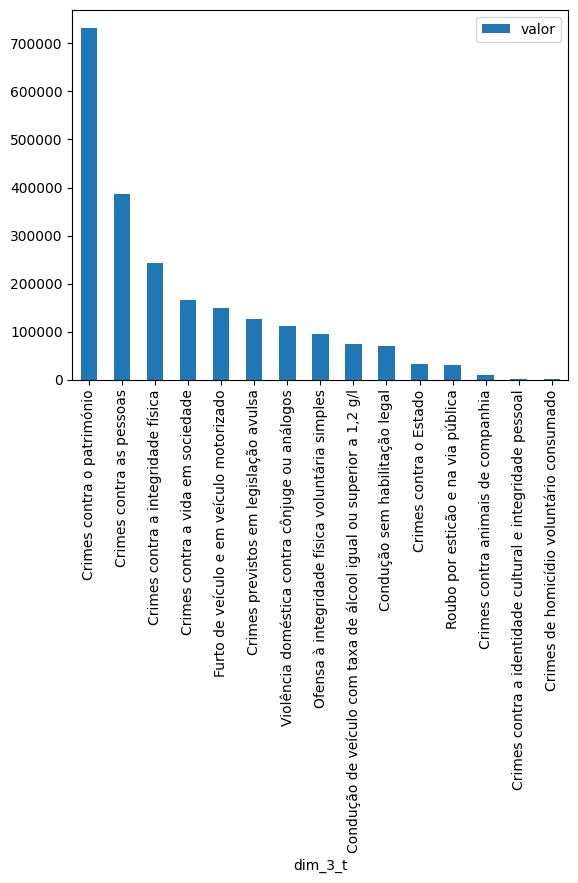

In [55]:
import matplotlib.pyplot as plt

filtered_df.plot(kind='bar',x='dim_3_t',y='valor')
plt.show()